# **Read Dataset**

In [1]:
import numpy as np
import pandas as pd

dataset1 = 'creditcard.csv'
df = pd.read_csv(dataset1)

print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

# **Count Number of Fraud and Non-fraud Records**

In [2]:
fraud_count = df['Class'].value_counts()[1]
nonfraud_count = df['Class'].value_counts()[0]

print(f"Number of Fraud Records: {fraud_count}")
print(f"Number of Non-Fraud Records: {nonfraud_count}")

Number of Fraud Records: 492
Number of Non-Fraud Records: 284315


# **Select sample of the records from the dataset**

In [3]:
fraud_data = df[df['Class'] == 1]
not_fraud_data = df[df['Class'] == 0]

fraud_size = 469

# Randomly sample a subset of fraud data
fraud_data_sampled = fraud_data.sample(n=fraud_size, random_state=42)

nonfraud_size = 10000
# Randomly sample a subset of not fraud data
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, random_state=42)

# Concatenate fraud and sampled not fraud data to create a partially balanced dataset
random_sample_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])

# Shuffle the dataset
random_sample_df = random_sample_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(random_sample_df)

           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10464   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10465  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10466   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10467   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10468   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V21 

# **Determine the count of null values**

In [4]:
total_null_values = random_sample_df.isna().sum()
print("Total Null Values:", total_null_values)

Total Null Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Determine the count of duplicate records**

In [5]:
total_duplicates = random_sample_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 19


# **Drop duplicate records**

In [6]:
random_sample_df.drop_duplicates(inplace=True)
print(random_sample_df)

           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10464   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10465  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10466   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10467   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10468   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V21 

# **Descriptive Statistics**

In [7]:
description=random_sample_df.describe()
print(description)

                Time            V1            V2            V3            V4  \
count   10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean    94631.658182     -0.191122      0.147069     -0.300308      0.185718   
std     47515.057419      2.489001      1.918253      2.429558      1.752485   
min         0.000000    -30.552380    -32.494845    -31.103685     -4.790224   
25%     54186.000000     -0.995440     -0.576400     -1.062824     -0.810192   
50%     85014.000000     -0.045415      0.103920      0.096928      0.044789   
75%    139134.250000      1.289356      0.886562      0.978076      0.884404   
max    172768.000000      2.398119     22.057729      3.770236     11.927512   

                 V5            V6            V7            V8            V9  \
count  10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean      -0.100491     -0.063392     -0.216265      0.048161     -0.094229   
std        1.802765      1.386576      2.0

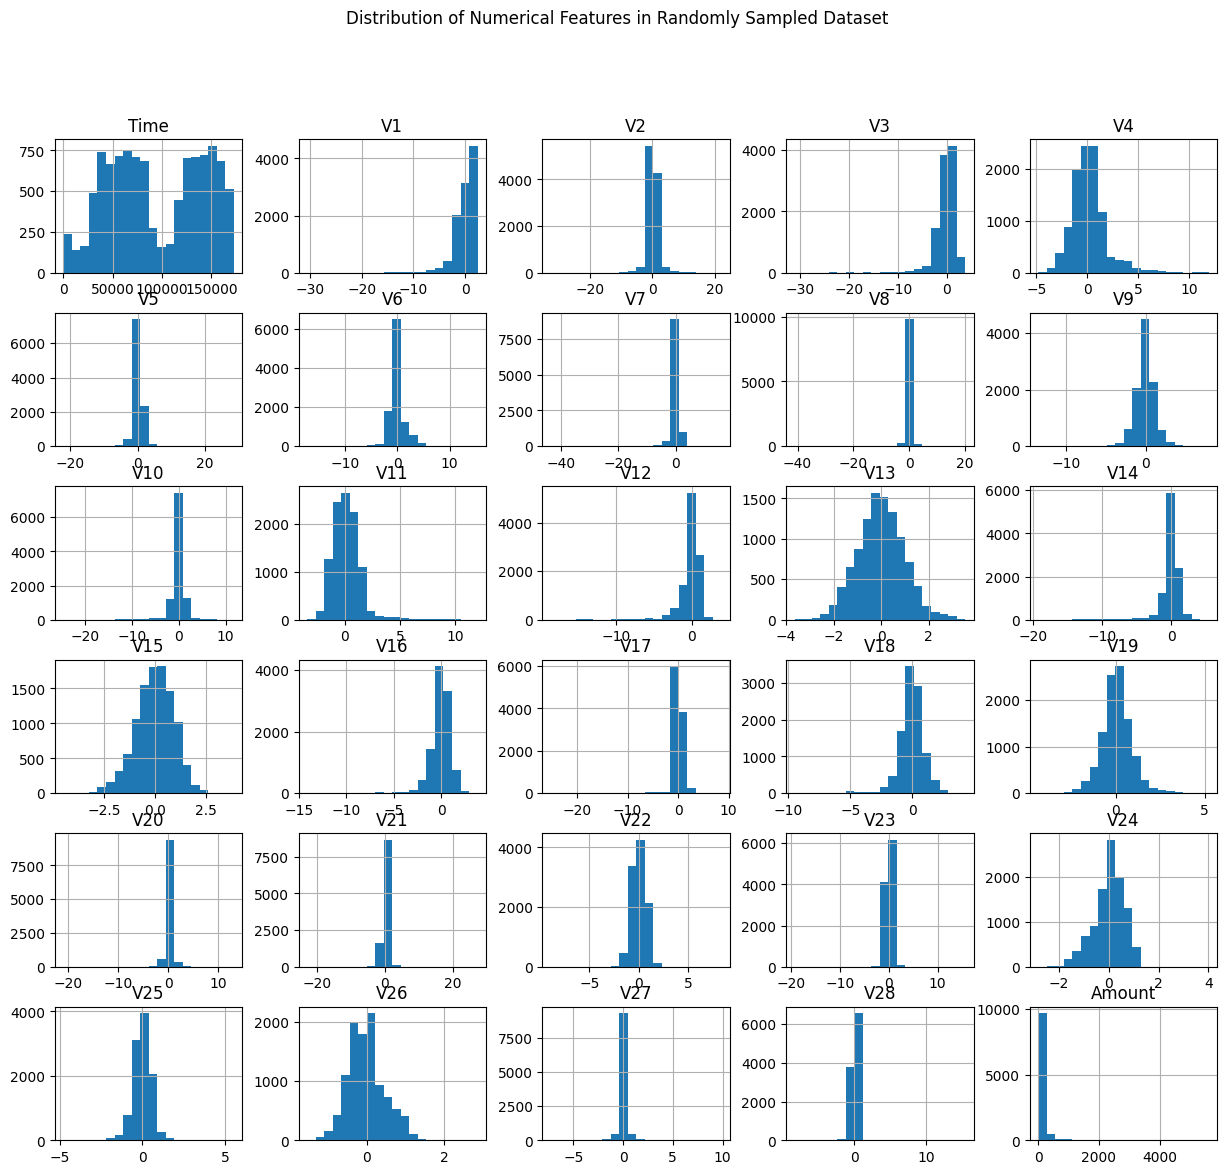

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

random_sample_df.drop('Class', axis=1).hist(figsize=(15, 13), bins=20)
plt.suptitle('Distribution of Numerical Features in Randomly Sampled Dataset')
plt.show()

# **Count of Fraud/Non-Fraud Records**

In [9]:
class_counts = random_sample_df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Class
0    9999
1     451
Name: count, dtype: int64


# **Split features and label**

In [10]:
X = random_sample_df.drop(["Class"], axis=1)
Y = random_sample_df["Class"]

# **Outliers identification and removal**

In [11]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis

# Resetting index for X and Y
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Calculate Mahalanobis distance
covariance = np.cov(X.T)
mean = np.mean(X, axis=0)
distances = [mahalanobis(x, mean, np.linalg.inv(covariance)) for x in X.values]

# Define the threshold for outliers
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify and handle outliers
outlier_mask = np.array(distances) > threshold
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Identify and handle outliers by removing them
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Display the modified feature set and labels without outliers
print(X_no_outliers)
print(Y_no_outliers)



           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10100   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10101  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10102   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10103   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10104   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V20 

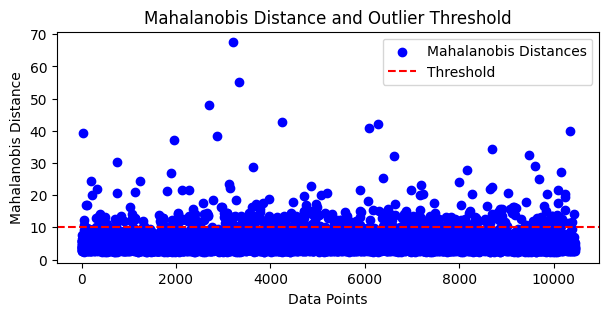

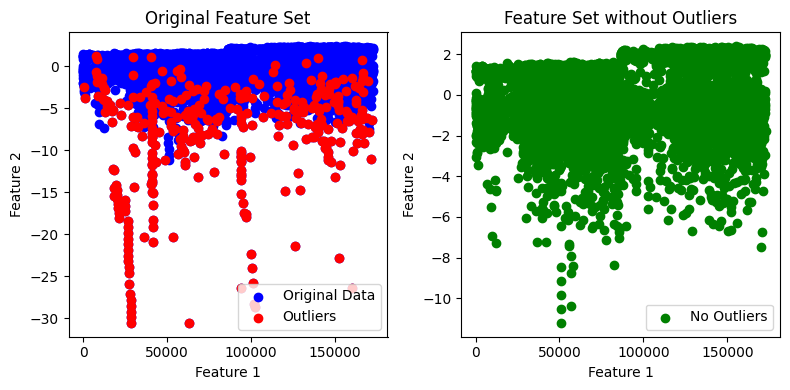

In [12]:
import matplotlib.pyplot as plt

# mhalanobis distances
plt.figure(figsize=(7, 3))
plt.scatter(range(len(distances)), distances, c='blue', label='Mahalanobis Distances')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Data Points')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance and Outlier Threshold')
plt.legend()
plt.show()

# before and after outliers removal
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Original Data')
plt.scatter(X[outlier_mask].iloc[:, 0], X[outlier_mask].iloc[:, 1], c='red', label='Outliers')
plt.title('Original Feature Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_no_outliers.iloc[:, 0], X_no_outliers.iloc[:, 1], c='green', label='No Outliers')
plt.title('Feature Set without Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


# **Splitting train and test data**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X_no_outliers, Y_no_outliers, test_size=0.3, random_state=42)


# **Selecting Top Effective Features**

In [14]:
# Train the decision tree model
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=4, criterion="entropy")
model.fit(X_train, Y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the indices
indices = np.argsort(feature_importances)[::-1]

# Select the top N features (e.g., top 10)
top_n = 10
top_n_features = X_train.columns[indices[:top_n]]

# Subset the training and test sets with the top N features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

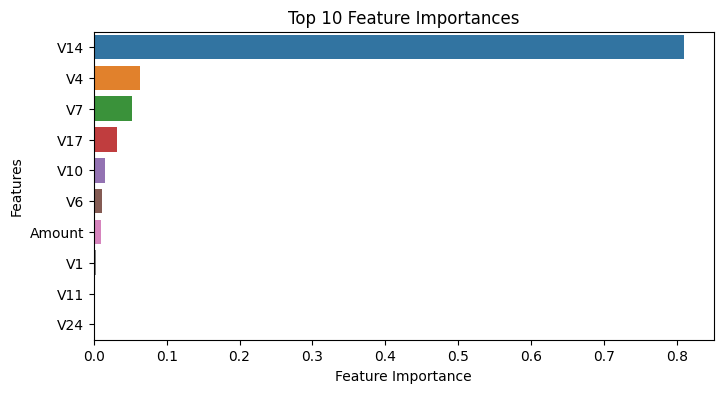

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances[indices[:top_n]], y=top_n_features)
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# **Standard Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# **Decision Tree Model Training** 

In [17]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42,min_samples_leaf=10, max_depth=4,criterion="entropy")

# Train the model on the training data
dt_model.fit(X_train_selected, Y_train)

# Make predictions on the test set
Y_pred = dt_model.predict(X_test_selected)

# **Decision Tree Model Plotting**

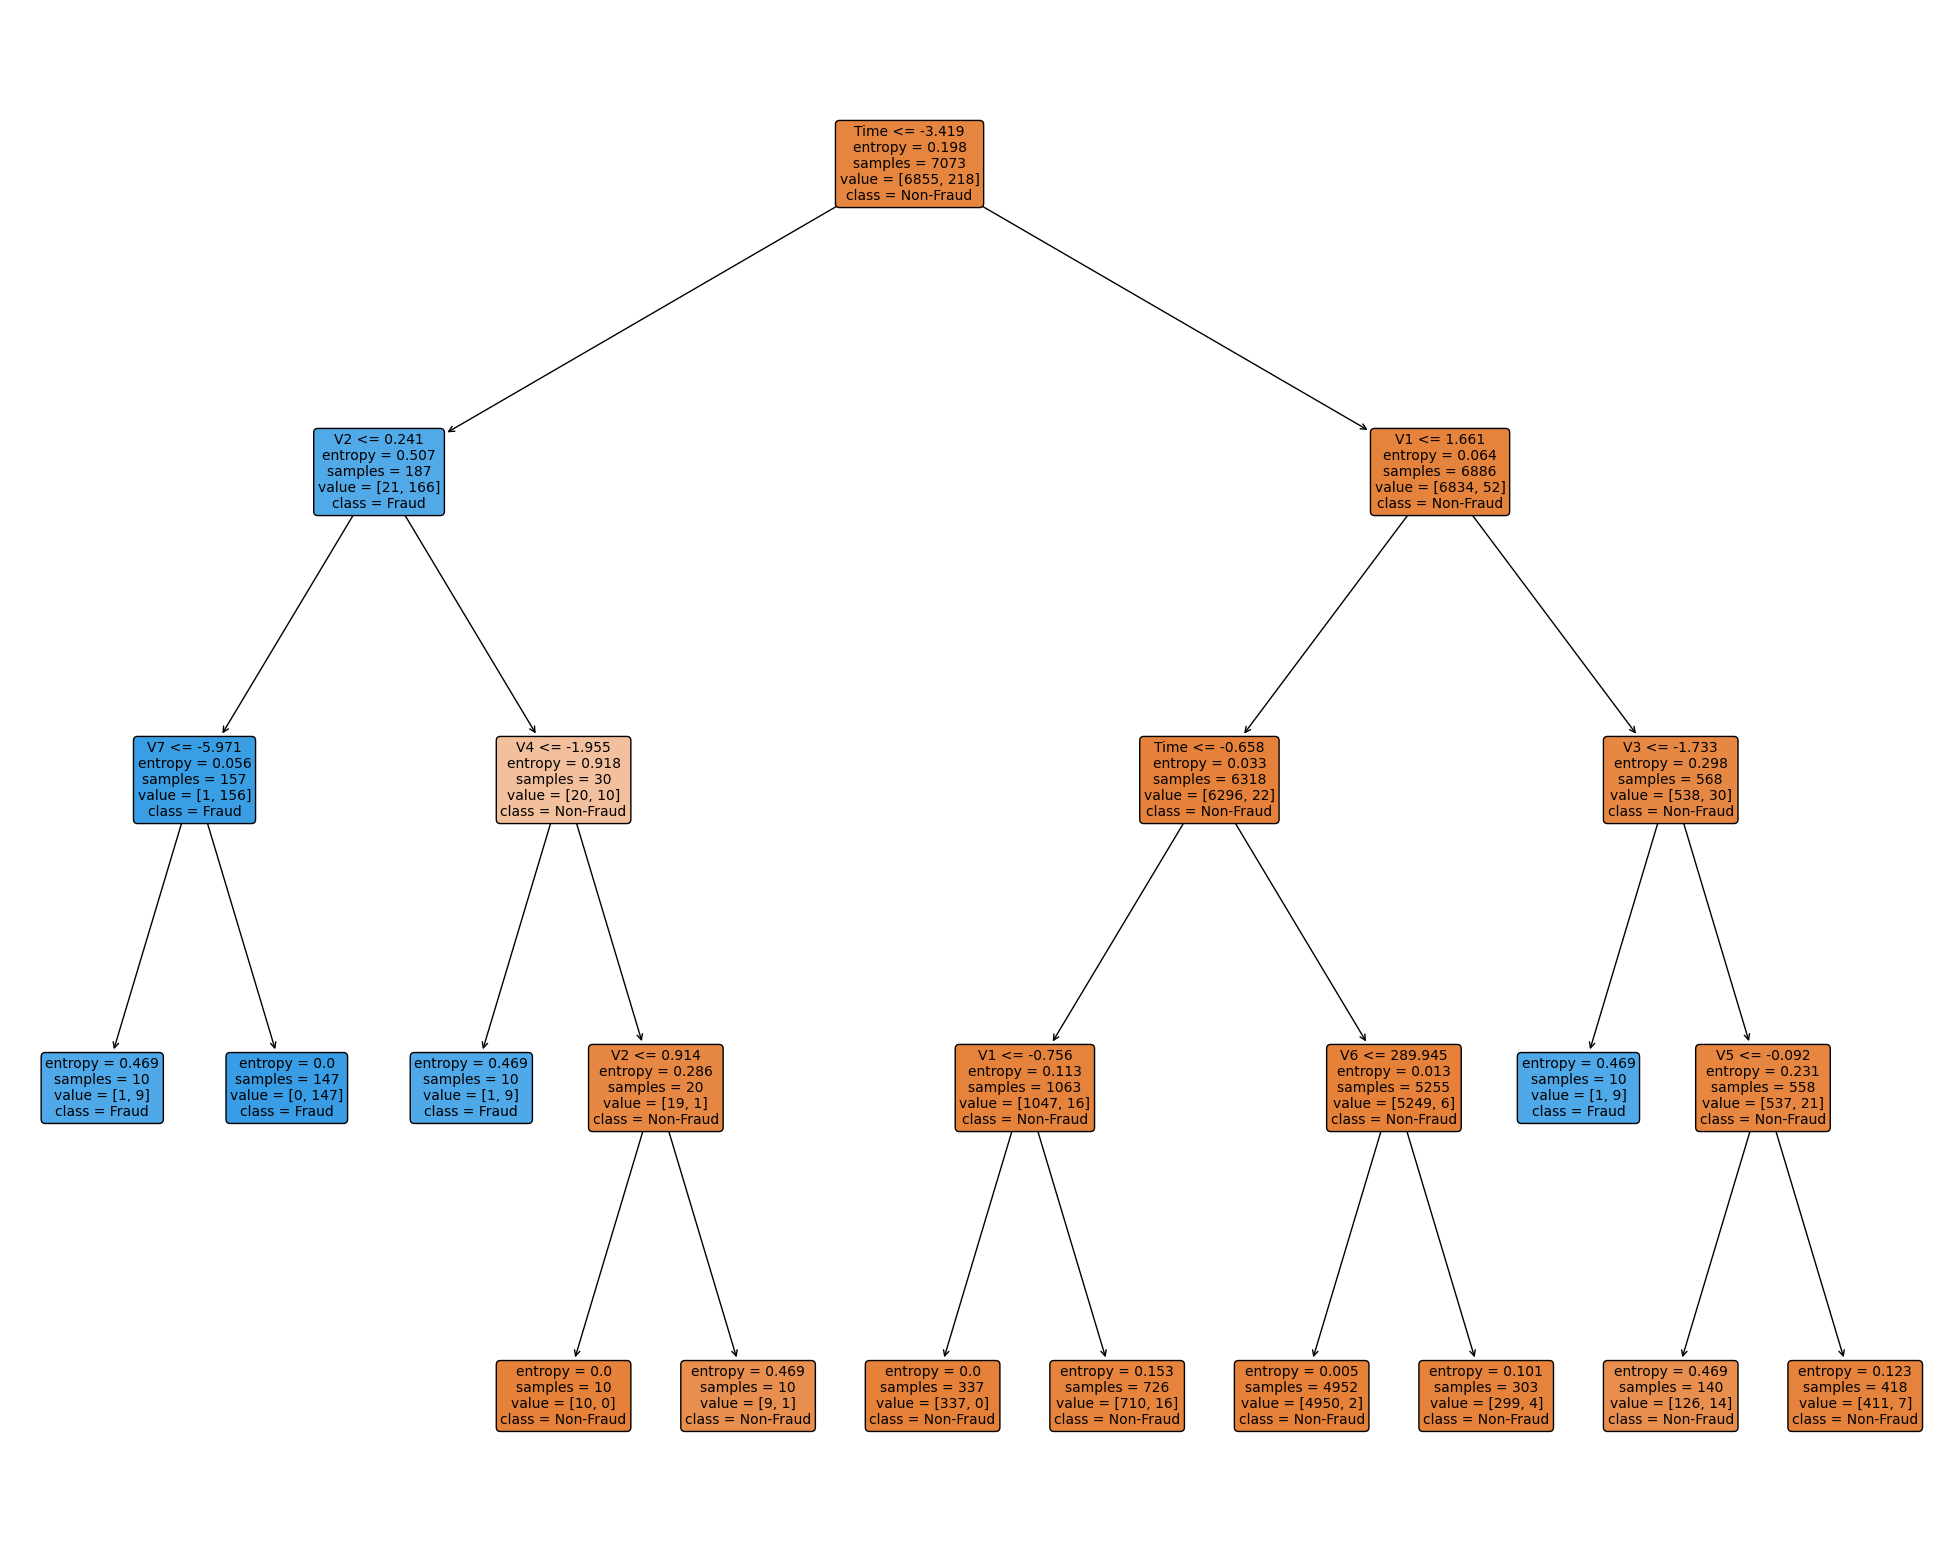

In [18]:
# Visualize the decision tree
plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=X_no_outliers.columns, class_names=['Non-Fraud', 'Fraud'], rounded=True, fontsize=10)
plt.show()

# **Decision Tree Model Evaluation**

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

# Assuming you have Y_test and Y_pred defined
# ...

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report_result = classification_report(Y_test, Y_pred)
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)



Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2935
           1       0.97      0.80      0.88        97

    accuracy                           0.99      3032
   macro avg       0.98      0.90      0.94      3032
weighted avg       0.99      0.99      0.99      3032


Confusion Matrix:
[[2933    2]
 [  19   78]]

Accuracy: 0.9930738786279684
Precision: 0.9929697946385796
Recall: 0.9930738786279684
F1 Score: 0.992751268624704


# **Decision Tree Model Confusion Matrix Plotting**

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

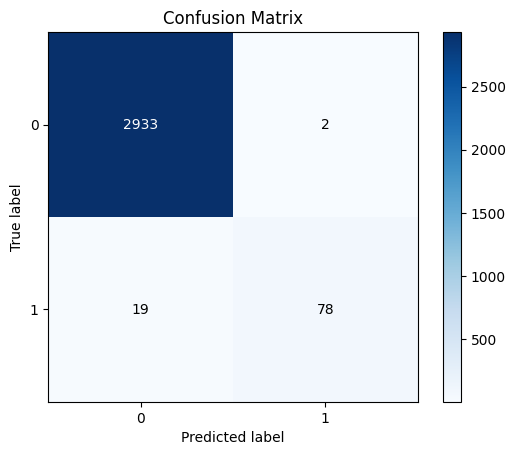

In [20]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)

# **Decision Tree Model Overfitting/Underfitting**

In [21]:
print('Training set score: {:.4f}'.format(dt_model.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(dt_model.score(X_test_selected, Y_test)))

Training set score: 0.9934
Test set score: 0.9931


# **Decision Tree Model Cross Validation**

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, accuracy_score, f1_score
import numpy as np

# Define the precision scorer with zero_division parameter
precision_scorer = make_scorer(precision_score, zero_division=1)

# Define the number of folds (k)
num_folds = 10

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9921818413295334
Precision: 0.9586894586894588
Recall: 0.7838709677419354
F1 Score: 0.8586606514181095


# **Gradient Boosting Model**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_model = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_depth=3, random_state=42)

# **Gradient Boosting Model Training and Evaluation**

In [24]:
gb_model.fit(X_train_selected, Y_train)

pred = gb_model.predict(X_test_selected)

print("Classification Report:\n", classification_report(Y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred))

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, pred, average='weighted')

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2935
           1       0.95      0.85      0.90        97

    accuracy                           0.99      3032
   macro avg       0.97      0.92      0.95      3032
weighted avg       0.99      0.99      0.99      3032

Confusion Matrix:
 [[2931    4]
 [  15   82]]

Accuracy: 0.9930738786279684
Precision: 0.9935832388653241
Recall: 0.9937335092348285
F1 Score: 0.9935510325974682


# **Gradient Boosting Model Confusion Matrix Plotting**

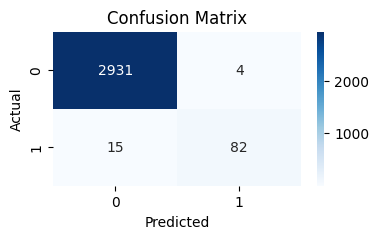

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Gradient Boosting Model Overfitting/Underfitting**

In [26]:
print('Training set score: {:.4f}'.format(gb_model.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(gb_model.score(X_test_selected, Y_test)))

Training set score: 0.9983
Test set score: 0.9937


# **Gradient Boosting Model Cross Validation**

In [27]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.99099411424822
Precision: 0.8995647425850921
Recall: 0.7995967741935484
F1 Score: 0.844051127397076


# **Logistic Regression Model Training**

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(max_iter=500)

logistic_regressor.fit(X_train_selected, Y_train)
L_pred = logistic_regressor.predict(X_test_selected)

# **Logistic Regression Model Evaluation**

In [29]:
# Evaluate the model
accuracy = accuracy_score(Y_test, L_pred)
classification_report_result = classification_report(Y_test, L_pred)
confusion_matrix_result = confusion_matrix(Y_test, L_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, L_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2935
           1       0.99      0.82      0.90        97

    accuracy                           0.99      3032
   macro avg       0.99      0.91      0.95      3032
weighted avg       0.99      0.99      0.99      3032


Confusion Matrix:
[[2934    1]
 [  17   80]]

Accuracy: 0.9940633245382586
Precision: 0.9940285756203291
Recall: 0.9940633245382586
F1 Score: 0.9938045765394985


# **Logistic Regression Overfitting/Underfitting**

In [30]:
print('Training set score: {:.4f}'.format(logistic_regressor.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(logistic_regressor.score(X_test_selected, Y_test)))

Training set score: 0.9925
Test set score: 0.9941


# **Logistic Regression Model Confusion Matrix Plotting**

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

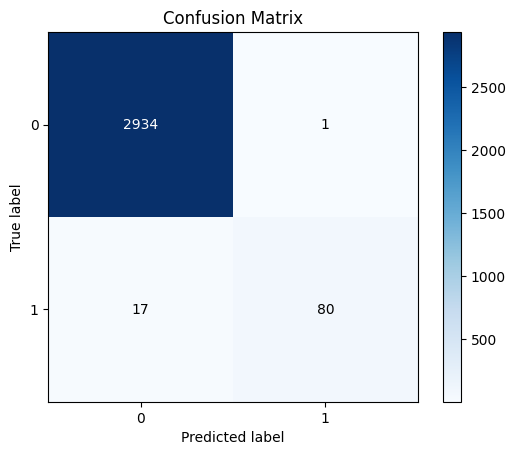

In [31]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, L_pred)

# **Logistic Regression Model Cross Validation**

In [32]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9900038193730353
Precision: 0.8889858120291935
Recall: 0.7773185483870967
F1 Score: 0.8258623965634871


# **KNN Model Training**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid with different values of k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize the KNeighborsClassifier
knnmodel = KNeighborsClassifier()

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(knnmodel, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_selected, Y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Initialize the model with the best value of k
best_knnmodel = KNeighborsClassifier(n_neighbors=best_k)

best_knnmodel.fit(X_train_selected, Y_train)

Y_pred = best_knnmodel.predict(X_test_selected)

# **KNN Model Evaluation**

In [34]:
# Make predictions
y_pred = best_knnmodel.predict(X_test_selected)

accuracy = accuracy_score(Y_test, y_pred)
classification_report_result = classification_report(Y_test, y_pred)
confusion_matrix_result = confusion_matrix(Y_test, y_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2935
           1       0.97      0.71      0.82        97

    accuracy                           0.99      3032
   macro avg       0.98      0.86      0.91      3032
weighted avg       0.99      0.99      0.99      3032


Confusion Matrix:
[[2933    2]
 [  28   69]]

Accuracy: 0.9901055408970977
Precision: 0.9899450753687216
Recall: 0.9901055408970977
F1 Score: 0.9893617143695906


# **KNN Model Confusion Matrix Plotting**

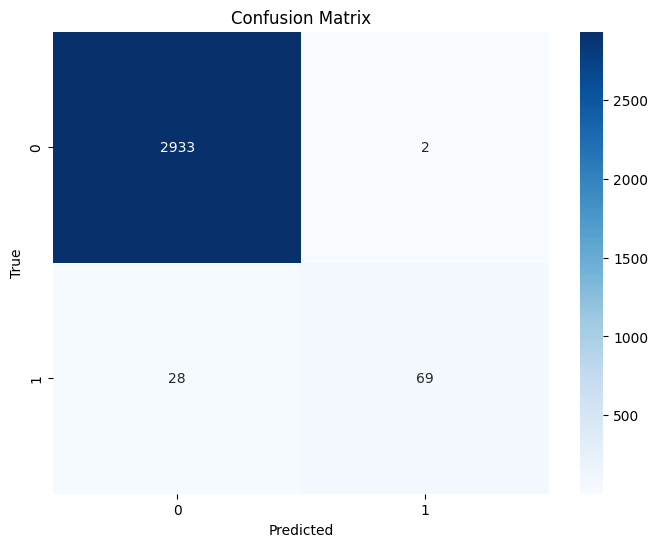

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **KNN Model Overfitting/Underfitting**

In [36]:
print('Training set score: {:.4f}'.format(best_knnmodel.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(best_knnmodel.score(X_test_selected, Y_test)))

Training set score: 0.9911
Test set score: 0.9901


# **KNN Model Cross Validation**

In [37]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9653644563269383
Precision: 0.3277763902763903
Recall: 0.07631048387096775
F1 Score: 0.12047383446296256


# ****Random Forest Model Training****

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf.fit(X_train_selected, Y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

# ****Random Forest Evaluation****

In [39]:
y_pred =rf.predict(X_test_selected)

print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2935
           1       1.00      0.82      0.90        97

    accuracy                           0.99      3032
   macro avg       1.00      0.91      0.95      3032
weighted avg       0.99      0.99      0.99      3032

Confusion Matrix:
 [[2935    0]
 [  17   80]]

Accuracy: 0.9901055408970977
Precision: 0.9944254286705135
Recall: 0.9943931398416886
F1 Score: 0.9941319793628555


# **Random Forest Model Overfitting/Underfitting**

In [40]:
print('Training set score: {:.4f}'.format(rf.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test_selected, Y_test)))

Training set score: 0.9999
Test set score: 0.9944


# ****Random Forest Cross Validation****

In [41]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9931711568782993
Precision: 0.9788103968377803
Recall: 0.7963709677419354
F1 Score: 0.874405573005436


# ****Naive Bayes Model Training****

In [42]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train_selected, Y_train)

GaussianNB()

# ****Naive Bayes Evaluation****

In [43]:
nb_pred = naive.predict(X_test_selected)

print("Classification Report:\n", classification_report(Y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, nb_pred))

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, nb_pred,average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2935
           1       0.66      0.85      0.74        97

    accuracy                           0.98      3032
   macro avg       0.83      0.92      0.86      3032
weighted avg       0.98      0.98      0.98      3032

Confusion Matrix:
 [[2892   43]
 [  15   82]]
Accuracy: 0.9901055408970977
Precision: 0.983999842069865
Recall: 0.9808707124010554
F1 Score: 0.9820312216894062


# **Naive Bayes Overfitting/Underfitting**

In [44]:
print('Training set score: {:.4f}'.format(naive.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(naive.score(X_test_selected, Y_test)))

Training set score: 0.9770
Test set score: 0.9809


# ****Naive Bayes Cross Validation****

In [45]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9885200419151706
Precision: 0.8720172056749507
Recall: 0.7456653225806452
F1 Score: 0.7998527692903741
